In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df=pd.read_csv("ExcavationDI.csv")

df.head(3)
len(df)

130

In [2]:
from new_plot import *
set_things()

ModuleNotFoundError: No module named 'new_plot'

In [3]:
import subprocess

In [4]:
from shadow.plot import *

In [5]:
df.describe()

,Sl,Dia,BucketCapacity,Experience,SoilStrata,Productivity
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,65.500000,316.153846,1.041538,5.092308,5.669231,15.329231
std,37.671829,237.494625,0.091316,1.137426,2.984166,4.144473
min,1.000000,100.000000,0.900000,3.000000,2.000000,9.000000
25%,33.250000,150.000000,0.900000,5.000000,4.000000,12.500000
50%,65.500000,200.000000,1.100000,5.000000,5.000000,14.000000
75%,97.750000,450.000000,1.100000,5.000000,6.000000,18.575000
max,130.000000,900.000000,1.100000,7.000000,15.000000,24.000000


In [6]:
X= df[df.columns[1:-1]]
y = df.Productivity

In [7]:
X.corr()

,Dia,BucketCapacity,Experience,SoilStrata
Dia,1.000000,-0.074073,0.043222,-0.177253
BucketCapacity,-0.074073,1.000000,-0.186471,0.138997
Experience,0.043222,-0.186471,1.000000,0.082148
SoilStrata,-0.177253,0.138997,0.082148,1.000000


In [8]:
y


0       9.5
1       9.2
2      13.2
3      10.5
4      23.0
       ... 
125    13.0
126    13.4
127    12.8
128    12.5
129    12.8
Name: Productivity, Length: 130, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def get_score(base='Training', actual=0,predicted=0):
    r2 = r2_score(actual,predicted)
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    print(base,r2.round(3),mae.round(3),mse.round(3))
    return r2,mae,mse

In [11]:
import pickle

In [12]:
# split=np.random.get_state()
rng = np.random.seed(2021)
np.random.randint(100)

85

In [13]:
# np.random.set_state(split)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=453)
X_train, X_val, y_train, y_val= train_test_split(X_train,y_train,test_size=0.25,random_state=int(13511))
scale = False
if scale:
    scaler=StandardScaler().fit(X_train)
    x_train=scaler.transform(X_train)
    x_val=scaler.transform(X_val)
    x_test=scaler.transform(X_test)
else:
    x_train=X_train
    x_test=X_test
    x_val=X_val

In [14]:
x_train.shape, x_val.shape, x_test.shape

((78, 4), (26, 4), (26, 4))

In [15]:
#linear regression
model=LinearRegression().fit(x_train,y_train)
get_score('Training',actual=y_train,predicted=model.predict(x_train))
get_score('validation',actual=y_val,predicted=model.predict(x_val))
get_score('Test',actual=y_test,predicted=model.predict(x_test))

Training 0.957 0.71 0.749
validation 0.945 0.701 0.75
Test 0.929 1.009 1.327


(0.9288490136578282, 1.008744149083151, 1.3274626891506383)

In [16]:
#lasso
from sklearn.linear_model import Lasso
model=Lasso(alpha=0.01)

model.fit(x_train,y_train)
get_score('Training',actual=y_train,predicted=model.predict(x_train))
get_score('validation',actual=y_val,predicted=model.predict(x_val))
get_score('Test',actual=y_test,predicted=model.predict(x_test))

Training 0.956 0.719 0.762
validation 0.947 0.669 0.719
Test 0.932 0.985 1.269


(0.9319612473201053, 0.985238646679401, 1.2693978009602864)

In [17]:
#ridge
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.0001)

model=Ridge().fit(x_train,y_train)
get_score('Training',actual=y_train,predicted=model.predict(x_train))
get_score('validation',actual=y_val,predicted=model.predict(x_val))
get_score('Test',actual=y_test,predicted=model.predict(x_test))

Training 0.953 0.745 0.809
validation 0.948 0.635 0.712
Test 0.934 0.96 1.232


(0.9339419299260311, 0.960050150610431, 1.2324442407415748)

In [18]:
#elastic net
from sklearn.linear_model import ElasticNet

model=ElasticNet(alpha=0.01)

model.fit(x_train,y_train)
get_score('Training',actual=y_train,predicted=model.predict(x_train))
get_score('validation',actual=y_val,predicted=model.predict(x_val))
get_score('Test',actual=y_test,predicted=model.predict(x_test))

Training 0.955 0.731 0.785
validation 0.948 0.648 0.71
Test 0.933 0.97 1.244


(0.9333021585933119, 0.9703968737126366, 1.2443804431392291)

In [19]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor
Rfreg=RandomForestRegressor(n_estimators=2,random_state=0)

model=Rfreg.fit(x_train,y_train)
get_score('Training',actual=y_train,predicted=model.predict(x_train))
get_score('validation',actual=y_val,predicted=model.predict(x_val))
get_score('Test',actual=y_test,predicted=model.predict(x_test))

#shap.summary_plot(x_train,plot_type='bar',feature_names=X.columns.tolist())

Training 0.992 0.243 0.14
validation 0.968 0.48 0.439
Test 0.981 0.437 0.348


(0.9813547817033219, 0.4370650183150182, 0.3478635067809173)

In [20]:
#Xg boost
from xgboost import XGBRegressor

xgbr=XGBRegressor(verbosity=0,n_estimators=10
            , max_depth=5, random_state=2021)
X_model=xgbr.fit(x_train,y_train)
get_score('Training',actual=y_train,predicted=X_model.predict(x_train))
get_score('validation',actual=y_val,predicted=X_model.predict(x_val))
get_score('Test',actual=y_test,predicted=X_model.predict(x_test))

Training 0.972 0.552 0.492
validation 0.987 0.332 0.174
Test 0.956 0.635 0.814


(0.956378153334907, 0.6345222326425406, 0.8138520188783318)

In [21]:
import shap
#help(shap.summary_plot)
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive


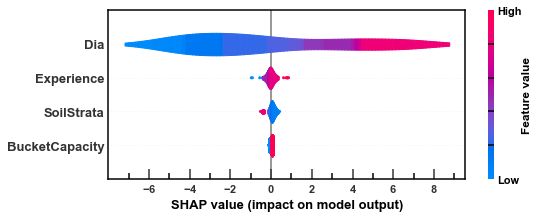

In [22]:
fig,ax=plt.subplots()

explainer = shap.TreeExplainer(X_model)
shap_values = explainer(x_train)



shap.summary_plot(shap_values, x_train,plot_type='violin',feature_names=X.columns.tolist(), show= False, color='#1E88E5')

# shap.summary_plot(shap_values, xtrain,feature_names=dftrain.columns.tolist()[:-1],plot_type='dot',show=False,color_bar=False,cmap='rainbow')
# aa=shap.summary_plot(shap_values, X,feature_names=newfnames,plot_type='dot',show=False,color_bar=False,cmap='rainbow')
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('Junaid.png')

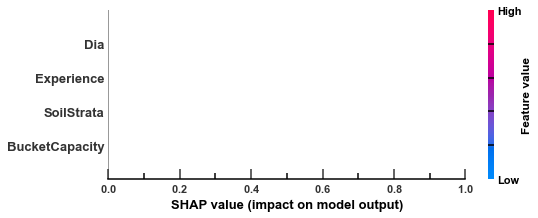

In [23]:

shap.summary_plot(shap_values,x_train,plot_type='beeswarm',feature_names=X.columns.tolist(), color='#1E88E5')

In [24]:
from new_plot import 

SyntaxError: invalid syntax (<ipython-input-24-e98db48df1fe>, line 1)

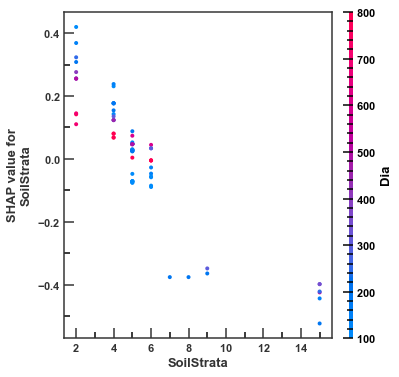

In [27]:
fig, ax = plt.subplots()
shap.dependence_plot (3,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=0,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('Junaid ivory tower.png')

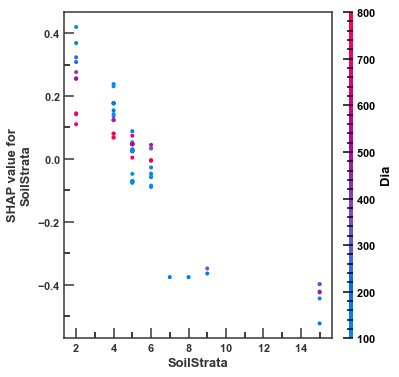

In [28]:
fig, ax = plt.subplots()
shap.dependence_plot (3,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=0,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('3 0.png')

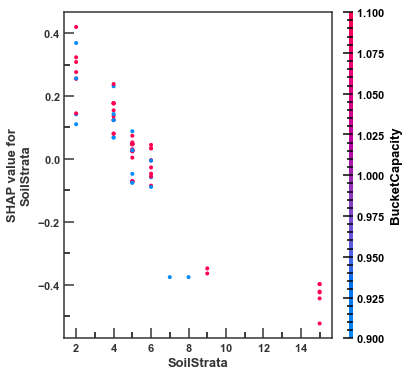

In [29]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (3,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=1,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('3 1.png')

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


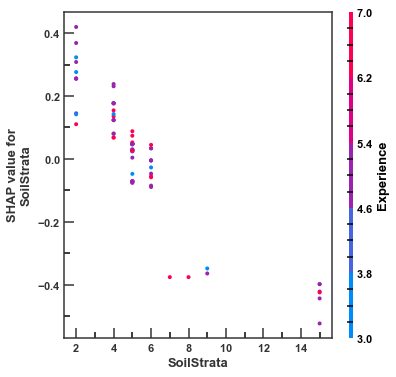

In [30]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (3,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=2,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('3 2.png')

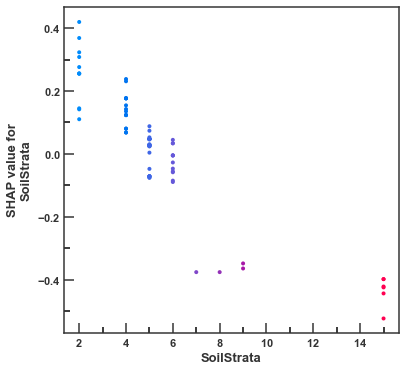

In [31]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (3,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=3,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('3 3.png')

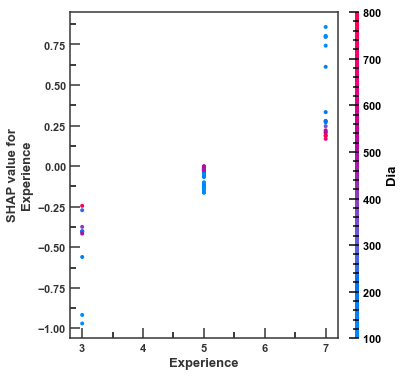

In [32]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (2,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=0,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('2 0.png')

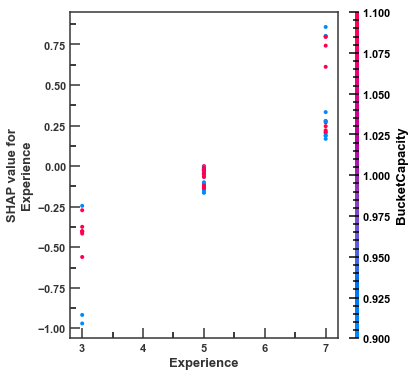

In [33]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (2,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=1,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('2 1.png')

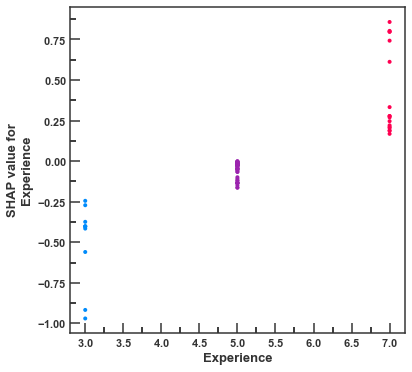

In [34]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (2,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=2,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('2 2.png')

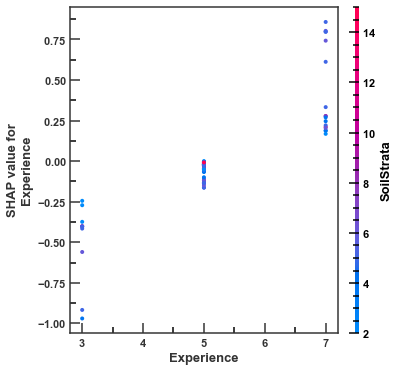

In [35]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (2,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=3,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('2 3.png')

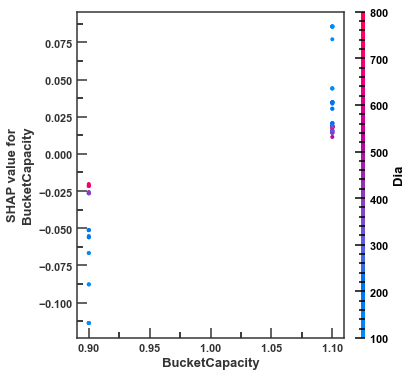

In [36]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (1,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=0,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('1 0.png')

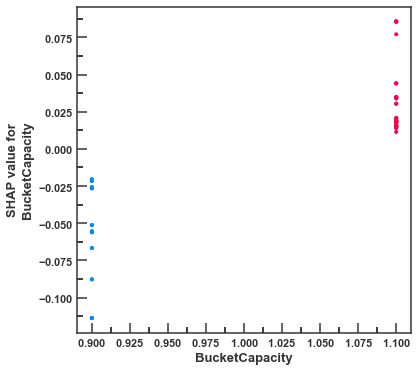

In [37]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (1,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=1,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('1 1.png')

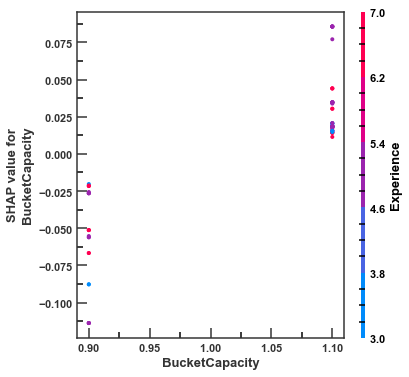

In [38]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (1,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=2,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('1 2.png')

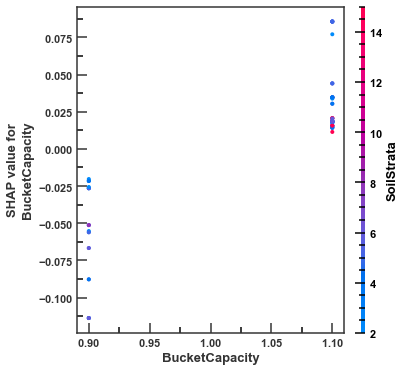

In [39]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (1,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=3,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('1 3.png')

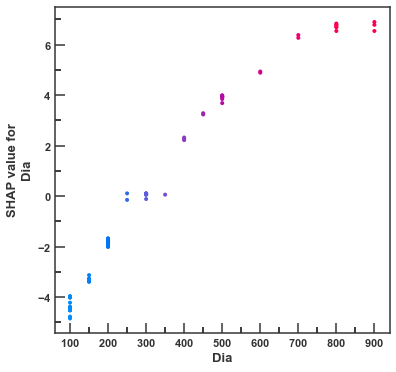

In [40]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (0,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=0,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('0 0.png')

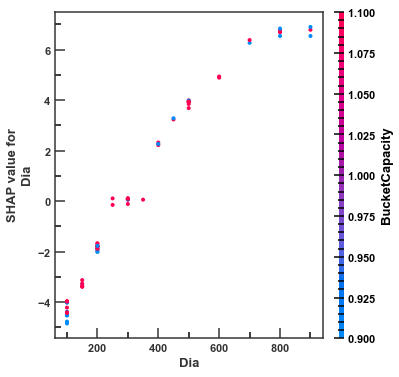

In [41]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (0,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=1,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('0 1.png')

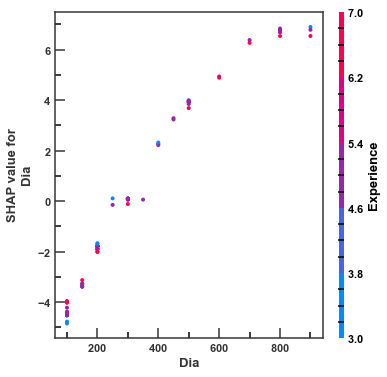

In [42]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (0,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=2,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('0 2.png')

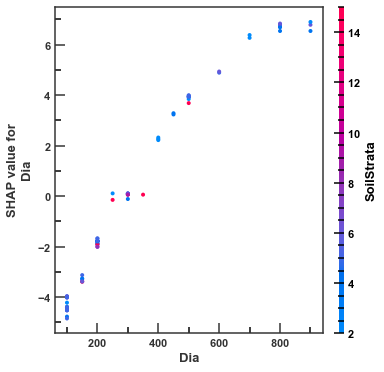

In [43]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
shap.dependence_plot (0,shap_values= shap_values.values, features= x_train,show= False, feature_names=X.columns, interaction_index=3,ax=ax)
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('0 3.png')

In [46]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(x_train)

TypeError: '(slice(None, None, None), Dia               1
BucketCapacity    2
Experience        3
SoilStrata        0
dtype: int64)' is an invalid key

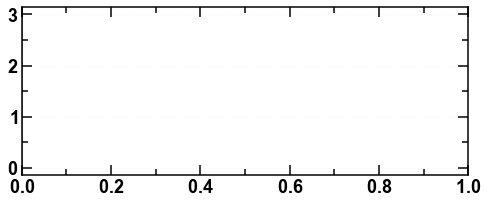

In [47]:
shap.summary_plot(x_train,plot_type='violin',feature_names=X.columns.tolist())

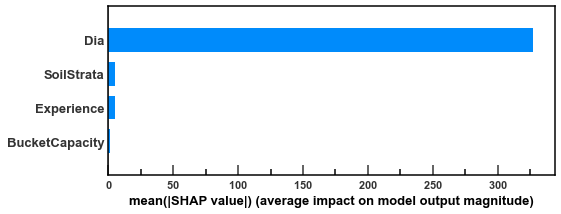

In [49]:
shap.summary_plot(x_train,plot_type='bar',show= False, feature_names=X.columns.tolist())
fig=plt.gca()
fig.spines['top'].set_visible(True) 
fig.spines['right'].set_visible(True)
fig.spines['left'].set_visible(True)
plt.savefig('Bar.png')

In [50]:
#SVM
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
model=svr()
sc.fit(x_train,y_train)
get_score('Training',actual=y_train,predicted=model.predict(x_train))
get_score('validation',actual=y_val,predicted=model.predict(x_val))
get_score('Test',actual=y_test,predicted=model.predict(x_test))

NameError: name 'svr' is not defined

In [51]:
#ANN
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
scalar.fit(x_train,y_train)
get_score('Training',actual=y_train,predicted=model.predict(x_train))
get_score('validation',actual=y_val,predicted=model.predict(x_val))
get_score('Test',actual=y_test,predicted=model.predict(x_test))

Training 0.992 0.243 0.14
validation 0.968 0.48 0.439
Test 0.981 0.437 0.348


(0.9813547817033219, 0.4370650183150182, 0.3478635067809173)

In [52]:
#neural network
import matplotlib

In [53]:
from sklearn.neural_network import MLPRegressor

In [54]:
hls=[]
n1=8
n2= 8
for i in range(1,n1+1):
    for j in range(1,n2+1):
        config= (i,j)
        hls.append(config)

In [56]:
n1=8
n2= 8
for i in range(1,n1+1):
    for j in range(1,n2+1):
        print(i,j)
# for c in hls:
        model=MLPRegressor(max_iter=12000,hidden_layer_sizes=(i,j),solver='adam', alpha=0.00001,random_state=2021).fit(x_train,y_train)
        get_score('Training',actual=y_train,predicted=model.predict(x_train))
        get_score('validation',actual=y_val,predicted=model.predict(x_val))
        get_score('Test',actual=y_test,predicted=model.predict(x_test))


1 1


Stochastic Optimizer: Maximum iterations (12000) reached and the optimization hasn't converged yet.


Training -0.997 4.51 34.625
validation -0.69 3.563 23.055
Test -0.762 4.346 32.882
1 2
Training -0.002 3.529 17.369
validation -0.062 3.298 14.492
Test -0.003 3.558 18.704
1 3
Training 0.972 0.567 0.483
validation 0.964 0.557 0.488
Test 0.956 0.792 0.821
1 4
Training 0.956 0.725 0.755
validation 0.948 0.625 0.709
Test 0.94 0.925 1.128
1 5
Training 0.947 0.798 0.922
validation 0.935 0.71 0.891
Test 0.934 0.967 1.228
1 6
Training 0.934 0.912 1.15
validation 0.916 0.859 1.148
Test 0.928 1.01 1.34
1 7
Training 0.931 0.91 1.193
validation 0.919 0.794 1.107
Test 0.925 1.036 1.408
1 8
Training -1.764 6.2 47.924
validation -2.455 6.362 47.143
Test -1.823 6.716 52.675
2 1
Training -0.002 3.529 17.368
validation -0.062 3.298 14.496
Test -0.003 3.558 18.705
2 2
Training 0.938 0.877 1.067
validation 0.917 0.818 1.135
Test 0.931 0.981 1.295
2 3
Training 0.954 0.713 0.8
validation 0.937 0.649 0.857
Test 0.952 0.771 0.888
2 4
Training 0.949 0.789 0.886
validation 0.943 0.667 0.773
Test 0.935 0.959 1.

Stochastic Optimizer: Maximum iterations (12000) reached and the optimization hasn't converged yet.


Training 0.93 0.915 1.217
validation 0.916 0.827 1.152
Test 0.927 1.008 1.369
3 3
Training -0.966 5.252 34.084
validation -1.783 5.692 37.966
Test -1.103 5.738 39.237
3 4
Training -0.828 4.957 31.698
validation -1.183 4.968 29.781
Test -0.821 5.266 33.969
3 5
Training 0.943 0.834 0.981
validation 0.93 0.768 0.953
Test 0.932 0.974 1.274
3 6
Training -0.863 5.185 32.312
validation -1.362 5.297 32.224
Test -0.901 5.606 35.463
3 7
Training 0.937 0.871 1.089
validation 0.921 0.833 1.072
Test 0.931 0.97 1.29
3 8
Training 0.939 0.868 1.063
validation 0.926 0.806 1.007
Test 0.931 0.975 1.282
4 1
Training 0.028 3.308 16.858
validation -0.021 3.164 13.936
Test -0.021 3.375 19.05
4 2
Training 0.946 0.814 0.939
validation 0.939 0.693 0.832
Test 0.934 0.964 1.235
4 3
Training -0.467 4.523 25.444
validation -0.728 4.441 23.578
Test -0.452 4.798 27.099
4 4
Training 0.979 0.493 0.364
validation 0.974 0.448 0.36
Test 0.975 0.558 0.473
4 5
Training 0.955 0.735 0.78
validation 0.94 0.692 0.818
Test 0.934

Stochastic Optimizer: Maximum iterations (12000) reached and the optimization hasn't converged yet.


Training -2.722 6.87 64.538
validation -2.449 5.78 47.056
Test -2.254 6.484 60.702
6 4
Training -1.942 6.703 51.023
validation -2.971 7.004 54.175
Test -1.907 7.196 54.233
6 5
Training 0.956 0.724 0.77
validation 0.945 0.705 0.749
Test 0.928 1.018 1.344
6 6
Training 0.916 0.994 1.452
validation 0.892 0.956 1.47
Test 0.923 1.025 1.437
6 7
Training -1.622 5.526 45.463
validation -1.747 5.311 37.481
Test -1.736 5.54 51.039
6 8
Training 0.941 0.844 1.021
validation 0.937 0.708 0.862
Test 0.93 0.962 1.305
7 1


Stochastic Optimizer: Maximum iterations (12000) reached and the optimization hasn't converged yet.


Training -0.855 4.313 32.169
validation -0.559 3.374 21.267
Test -0.643 4.205 30.662
7 2


Stochastic Optimizer: Maximum iterations (12000) reached and the optimization hasn't converged yet.


Training -2.433 6.495 59.526
validation -2.141 5.416 42.862
Test -2.0 6.109 55.979
7 3
Training 0.95 0.771 0.868
validation 0.948 0.647 0.703
Test 0.925 1.008 1.391
7 4
Training -1.028 5.56 35.163
validation -1.637 5.719 35.982
Test -0.963 5.927 36.619
7 5
Training 0.96 0.697 0.697
validation 0.949 0.689 0.694
Test 0.935 0.939 1.214
7 6
Training 0.964 0.626 0.627
validation 0.949 0.671 0.699
Test 0.969 0.625 0.578
7 7
Training 0.956 0.716 0.755
validation 0.938 0.73 0.84
Test 0.932 0.988 1.259
7 8
Training -1.719 6.391 47.145
validation -2.629 6.647 49.517
Test -1.524 6.451 47.098
8 1


Stochastic Optimizer: Maximum iterations (12000) reached and the optimization hasn't converged yet.


Training -0.983 4.492 34.391
validation -0.677 3.545 22.882
Test -0.751 4.333 32.67
8 2
Training -1.544 5.958 44.122
validation -2.135 6.08 42.777
Test -1.596 6.404 48.427
8 3
Training -1.086 5.168 36.169
validation -1.352 5.129 32.096
Test -1.162 5.352 40.327
8 4
Training -1.248 5.327 38.976
validation -1.509 5.29 34.238
Test -1.352 5.494 43.89
8 5
Training -0.749 5.175 30.326
validation -1.265 5.299 30.901
Test -0.68 5.492 31.337
8 6
Training -1.499 5.502 43.327
validation -1.691 5.407 36.712
Test -1.633 5.604 49.122
8 7
Training -3.244 8.07 73.599
validation -4.369 8.094 73.256
Test -2.846 7.879 71.759
8 8
Training -2.047 6.818 52.829
validation -3.047 7.073 55.22
Test -1.957 7.263 55.161


In [57]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer(x_train)
shap.summary_plot(x_train,plot_type='bar',feature_names=X.columns.tolist())

Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>

In [ ]:
#PD Plots
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
feature_names=X.columns
print(feature_names)

In [ ]:
#Xg boost
from xgboost import XGBRegressor

xgbr=XGBRegressor(verbosity=0,n_estimators=10
            , max_depth=5, random_state=2021)
X_model=xgbr.fit(x_train,y_train)
get_score('Training',actual=y_train,predicted=X_model.predict(x_train))
get_score('validation',actual=y_val,predicted=X_model.predict(x_val))
get_score('Test',actual=y_test,predicted=X_model.predict(x_test))

X_model.fit(X_train, y_train)

features = [i for i in range(0, len(X.columns))]  # Features used for computing and plotting PDPlot
plot_partial_dependence(X_model, X_train, features, feature_names, n_jobs=3, grid_resolution=20)
fig = plt.gcf()

fig.set_size_inches(25, 30)
fig.subplots_adjust(wspace=0.4,hspace=0.6)
plt.savefig('skew_bridge_PDP.eps',format='eps', dpi=1000)

In [ ]:
#ALE
XGB_ale = ALE(X_model.predict, feature_names=feature_names, target_names=['EDP'])
XGB_exp = XGB_ale.explain(X_train)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE, plot_ale

import shap
import xgboost
import pandas as pd
import numpy as np
import matplotlib.pylab as pl

In [ ]:
feature_names = X.columns
print(feature_names)